In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'/Users/wiamboumaazi/Downloads/clean_tweet_dataset.csv')
#df[['no_followers','no_followings', 'no_userfavorites','no_lists' , 'no_tweets','no_retweets','no_favorites', 'no_hashtags', 'no_usermentions','no_urls', 'label']]=df[['no_followers','no_followings', 'no_userfavorites','no_lists' , 'no_tweets','no_retweets','no_favorites', 'no_hashtags', 'no_usermentions','no_urls', 'label']].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.dropna(inplace=True)

In [5]:
df[['no_followers','no_followings', 'no_userfavorites','no_lists' , 'no_tweets','no_retweets','no_favorites', 'no_hashtags', 'no_usermentions','no_urls', 'label']]=df[['no_followers','no_followings', 'no_userfavorites','no_lists' , 'no_tweets','no_retweets','no_favorites', 'no_hashtags', 'no_usermentions','no_urls', 'label']].astype(int)

In [6]:
df.head()

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls,label
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0,0


In [7]:
#get the labels
y=df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [8]:
#get all features without labels
x=df.drop('label',axis=1)
x.head()

,tweet,tweet_clean,no_followers,no_followings,no_userfavorites,no_lists,no_tweets,no_retweets,no_favorites,no_hashtags,no_usermentions,no_urls
0,That just seriously ruined my night..,seriously ruined night,163,139,1560,1,25985,0,0,0,0,0
1,@JessleaC I no they are so funny ..! I love yo...,jessleac funny love pictures take really good ...,113,197,1072,1,2142,0,0,0,1,0
2,@honkwas might drive so we could go subway or ...,honkwas might drive could go subway mcdonalds ...,168,382,1732,1,3493,0,0,0,1,0
3,That @brad_frost post is bourne out by my expe...,bradfrost post bourne experience current proje...,285,596,5765,45,8670,0,0,0,1,0
4,why tf do i keep waking up every 2 hours -.-,tf keep waking every hours,631,353,1589,2,12285,0,0,0,0,0


In [9]:
#create a list to hold the values of the clean tweets after preprocess
text_tweets = []
for value in df['tweet_clean'].values:
    text_tweets.append(value)

text_tweets[2]

'honkwas might drive could go subway mcdonalds want'

In [10]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#countVectorizer returns a set of phrases from the text 
#max_features: number of phrases to collect
#ngram_range: number of words in each phrase
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(text_tweets).toarray()

In [11]:
cv.get_feature_names()[:10]

['abc',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'ac',
 'acc',
 'accept']

In [12]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [13]:
#create a df that shows the number of phrase occuring/repeated in each row of X_train dataset
count_phrase_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_phrase_df.head()

,abc,ability,able,absolute,absolutely,abt,abuse,ac,acc,accept,...,youve relentlessly go,yr,yrs,yu,yup,zayn,zaynmalik,zero,zodiacfacts,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
classifier=MultinomialNB()


In [16]:
classifier.fit(X_train, y_train)

MultinomialNB()

array([[245257,   1255],
       [ 11361,  44452]])

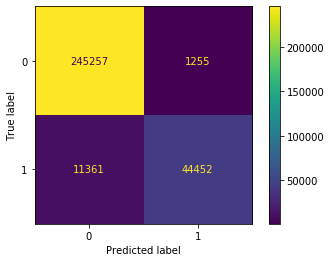

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def confusion():
    plot_confusion_matrix(classifier, X_test, y_test.values)
    M = confusion_matrix(y_test, classifier.predict(X_test))
    return M

M = confusion()
M

In [30]:
precision = M[1,1] / (M[1,1] + M[0,1])
recall = M[1, 1] /( M[1,1] + M[1,0])
F1 = (2 * (precision*recall))/ (precision + recall)
F1

0.8757289204097715

In [31]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, classifier.predict(X_test))
print("accuracy:   %0.3f" % score)

accuracy:   0.958


In [32]:
#Multinomial Classifier with Hyperparameter
#to find the best accuracy
#with default value
classifier2 = MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier2=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.958293227486976
Alpha: 0.1, Score : 0.9582965351856446
Alpha: 0.2, Score : 0.9582866120896386
Alpha: 0.30000000000000004, Score : 0.9582866120896386
Alpha: 0.4, Score : 0.9582667658976267
Alpha: 0.5, Score : 0.9582766889936327
Alpha: 0.6000000000000001, Score : 0.9582766889936327
Alpha: 0.7000000000000001, Score : 0.9582700735962953
Alpha: 0.8, Score : 0.958273381294964
Alpha: 0.9, Score : 0.9582700735962953


In [33]:
#features names are the phrases we got previously
feature_names = cv.get_feature_names()

In [34]:
#each phrase got a coef
#most negative is fakest
classifier2.coef_[0]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-11.73847566,  -9.81108456, -11.49534961, ..., -11.29992483,
       -13.48538456, -13.06252771])

In [35]:
### Most real
sorted(zip(classifier2.coef_[0], feature_names), reverse=True)[:20]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.461686513460613, 'gameinsight'),
 (-3.695392866979759, 'rt'),
 (-3.8312730923290914, 'ive'),
 (-4.050306121496691, 'ff'),
 (-4.111319934933416, 'android'),
 (-4.180025919191088, 'gold'),
 (-4.195848805131032, 'coins'),
 (-4.197259901446225, 'collected'),
 (-4.197405990638806, 'gold coins'),
 (-4.197600809433592, 'ive collected'),
 (-4.197649520063235, 'ive collected gold'),
 (-4.197649520063235, 'collected gold coins'),
 (-4.197649520063235, 'collected gold'),
 (-4.204639684124963, 'androidgames'),
 (-4.227011205014215, 'follow'),
 (-4.238666583838262, 'androidgames gameinsight'),
 (-4.348696395951267, 'android androidgames'),
 (-4.3505677388736395, 'android androidgames gameinsight'),
 (-4.413465715711643, 'ipad'),
 (-4.460239345675925, 'ipadgames')]

In [36]:
### Most fake
sorted(zip(classifier2.coef_[0], feature_names))[:20]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-14.232598964171931, 'abuse'),
 (-14.232598964171931, 'adam yauch'),
 (-14.232598964171931, 'adam yauch park'),
 (-14.232598964171931, 'admit'),
 (-14.232598964171931, 'adults'),
 (-14.232598964171931, 'agenda'),
 (-14.232598964171931, 'agreed'),
 (-14.232598964171931, 'aint even'),
 (-14.232598964171931, 'aint shit'),
 (-14.232598964171931, 'alfredoflores pretty'),
 (-14.232598964171931, 'alfredoflores pretty sure'),
 (-14.232598964171931, 'allah'),
 (-14.232598964171931, 'almost tackled'),
 (-14.232598964171931, 'almost tackled stage'),
 (-14.232598964171931, 'amen'),
 (-14.232598964171931, 'americans'),
 (-14.232598964171931, 'amsterdam'),
 (-14.232598964171931, 'anger'),
 (-14.232598964171931, 'announcement'),
 (-14.232598964171931, 'annual')]